In [1]:
!pip install --upgrade nbformat

In [2]:
# import packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objects as go
# setting up options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)
warnings.filterwarnings('ignore')

In [3]:
# import datasets
TRAIN_PATH = 'train.csv'
TEST_PATH = 'test.csv'
SUBMISSION = 'sample_solution.csv'

df_train = pd.read_csv(TRAIN_PATH)
df_test = pd.read_csv(TEST_PATH)
submission = pd.read_csv(SUBMISSION)


In [4]:
df_train.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
0,0,0.108590,0.004314,-37.566000,0.017364,0.289150,-10.251000,135.120000,168900.000000,399240000000000.000000,86.489000,0.598810,1423200000.000000,0.272400,9.455600,-0.050305,1938.300000,8.633100,4.060700,26.867000,-1.180000,10961.000000,1.539700,135.320000,-1.496500,440.080000,2590100000000.000000,2194200000.000000,2968800.000000,0.001431,13.327000,0.750500,18509.000000,146820.000000,-0.000276,10906000000000000.000000,1705.400000,414.290000,3.539200,1888.000000,0.968930,18.388000,-0.001583,7.705900,5.932500,0.025693,4.560400,0.611220,10.795000,0.341930,0.235010,NaN,5237.700000,1.296100,163.660000,0.403780,0.188600,-0.001446,-0.354160,6.643200,0.305340,0.514020,1907300000.000000,29.861000,0.965010,1797.200000,72.178000,108.620000,1.979900,1.290700,0.995190,1.322800,827.340000,777990000000000.000000,41299000000.000000,0.006994,6.983500,43956.000000,1978.200000,5.508400,-0.001081,6.124400,123180000000.000000,275.920000,5308500.000000,1704.000000,50224000000.000000,53.398000,-2.201200,6871.000000,3.886200,-0.005580,5252.100000,166.690000,1.607400,0.665340,7768.900000,0.996620,112570000000.000000,2.243200,0.934160,0.650560,94569.000000,21.471000,8214.100000,0.288010,0.097826,0.001071,1412400000.000000,0.110930,-12.228000,1.748200,1.909600,-7.115700,4378.800000,1.209600,861340000000000.000000,140.100000,1.017700,1
1,1,0.100900,0.299610,11822.000000,0.276500,0.459700,-0.837330,1721.900000,119810.000000,3874100000000000.000000,9953.600000,1.209300,3334100000.000000,0.286310,-0.012858,-0.019912,10.284000,6.187200,1.041900,4.640400,31.877000,123620.000000,1.395100,125.810000,1.198900,136.450000,9098100000.000000,40041000000.000000,1564000.000000,0.000204,3.107400,1.503300,238000.000000,21440.000000,-0.001344,30794000000000000.000000,229.100000,844.820000,1.468000,4726.500000,0.915380,-1.532100,0.982600,7.111200,2.079700,0.042321,4.252300,0.418710,5.449900,0.012737,0.386470,7.308200,283.210000,-0.925520,140.800000,0.247390,-0.001656,-0.000975,-0.226290,2.424600,0.771470,0.011613,1803700000.000000,64.604000,0.262650,4455.000000,78.339000,745.510000,2.906900,1.482600,1.005100,1.497400,84.446000,3505600000000000.000000,2242300000.000000,0.896300,4.674900,17713.000000,9003.100000,-4.354600,0.254100,6.919100,183240000000.000000,9.651000,32800.000000,1480.600000,23006000000.000000,44.051000,205.690000,4295.300000,13.388000,0.468430,754.610000,83.233000,1.189000,29.550000,7343.700000,0.998150,48777000000000.000000,1.270800,-0.000969,5.295200,6779.000000,227.720000,34.342000,0.340300,0.143370,0.049276,1903200000.000000,0.976730,-56.758000,4.168400,0.348080,4.142000,913.230000,1.246400,7575100000000000.000000,1861.000000,0.283590,0
2,2,0.178030,-0.006980,907.270000,0.272140,0.459480,0.173270,2298.000000,360650.000000,12245000000000.000000,15827.000000,0.381640,1230300000.000000,0.258070,2.455600,NaN,26.873000,7.546300,1.996700,1.952600,817.760000,-2948.700000,2.005400,1.682600,1.196800,74.624000,-32739000000.000000,57189000000.000000,11058.000000,-0.003097,8.024100,1.131800,27940.000000,862460.000000,-0.002207,58491000000000.000000,-897.840000,NaN,1.356100,3063.400000,0.086232,16.106000,0.001481,11.476000,5.343000,0.012162,4.101800,-0.882700,8.122800,-0.676690,0.337700,-1.073200,4097.000000,13.458000,159.240000,0.322300,0.560090,0.000455,-0.160830,3.575300,0.609700,0.028301,527130000.000000,14.454000,0.115490,14605.000000,36.992000,-9.639100,64.267000,NaN,0.992780,2.589100,430.400000,-44535000000000.000000,5144900000000.000000,0.099591,6.551600,1887.500000,43319.

In [5]:
df_test.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118
0,957919,0.165850,0.487050,1295.000000,0.023100,0.319000,0.901880,573.290000,3743.700000,2705700000000.000000,6221.000000,1.172000,5175000000.000000,0.258310,3.420500,0.044983,1001.600000,10.104000,10.536000,19.517000,-1.120900,1577.600000,2.184700,96.109000,1.153500,95.865000,2847100000000.000000,96421000000.000000,6406000.000000,0.002990,6.635300,-0.015913,21723.000000,67604.000000,-0.000227,60462000000000000.000000,203.580000,301.790000,1.346100,5524.600000,-0.003163,21.883000,0.027383,7.211300,24.825000,-0.001420,4.895000,-1.087100,7.056100,-1.061500,0.000100,1.856000,449.990000,-0.362860,160.630000,0.248010,0.623000,0.000116,-0.393840,1.903800,0.068588,0.020439,2506500000.000000,48.164000,-0.002272,78643.000000,112.360000,1021.900000,11.481000,1.157300,0.002995,1.819200,1096.800000,300410000000000.000000,2042300000.000000,0.085500,4.631200,1683.100000,9833.600000,NaN,0.510410,4.032200,247790000000.000000,69.264000,5494800.000000,1239.000000,534930000.000000,5.308600,182.590000,829.170000,5.231900,0.010301,3640.800000,112.120000,-0.434420,11.161000,3755.700000,0.999260,53382000000.000000,1.386700,-0.001878,58.794000,75657.000000,187.240000,1258.900000,0.163340,0.055398,0.020002,795640000.000000,0.162530,-22.189000,2.065500,0.430880,-10.741000,81606.000000,1.194000,198040000000000.000000,2017.100000,0.463570
1,957920,0.129650,0.373480,1763.000000,0.728840,0.332470,-1.263100,875.550000,554370.000000,595570000000000.000000,934.430000,1.897900,4905100000.000000,0.284710,2.138700,-0.034328,35.223000,6.587300,12.734000,29.590000,4.163900,31915.000000,3.115800,109.430000,-0.852200,991.370000,4700100000.000000,1618200000000.000000,967810.000000,1.021500,2.961700,0.810310,415570.000000,384720.000000,0.002243,6712900000000000.000000,228.590000,33.952000,1.493800,2067.500000,-0.002343,32.772000,0.092283,6.536300,2.077300,0.046237,4.459000,-0.840920,4.447300,-1.001200,0.003750,99.647000,8146.800000,22.504000,153.400000,0.430760,0.743010,-0.000047,-0.116920,1.654400,0.467440,0.129650,444280000.000000,38.506000,0.396220,74296.000000,93.629000,-15.691000,30.655000,1.231100,1.004400,2.248400,780.870000,121360000000000.000000,348820000000.000000,-0.000792,6.999300,2451.600000,10483.000000,-5.354400,0.067286,5.404400,246260000000.000000,810.300000,860670.000000,2165.200000,271150000.000000,10.232000,515.410000,262.710000,5.635700,0.374220,420.160000,116.230000,1.269800,0.786190,1207.000000,1.000700,20650000000000.000000,1.288800,0.248850,9.985700,16323.000000,244.460000,647.580000,0.253820,0.008800,0.018479,112060000.000000,0.815280,-1.634200,1.573600,-1.071200,11.832000,90114.000000,1.150700,43880000000000000.000000,6638.900000,0.281250
2,957921,0.120190,0.445210,736.260000,0.046150,0.296050,0.316650,2659.500000,317140.000000,397780000000000.000000,131.810000,-0.484040,3800000.000000,0.371730,0.402450,0.015119,1991.600000,6.005000,0.991900,11.949000,888.070000,887.700000,3.523700,108.140000,-1.654200,528.140000,2463600000000.000000,9005900000.000000,7259.300000,1.007400,2.612300,1.062500,-208010.000000,65708.000000,0.001391,81298000000000.000000,-84.032000,NaN,1.755600,4729.200000,0.003527,861.660000,0.902670,9.393400,58.785000,0.007244,5.664500,-0.627470,6.580600,-1.128200,0.386500,56.547000,125.360000,12.703000,147.380000,0.414370,0.519980,0.000857,-0.120650,5.411500,0.772530,0.128850,5664900000.000000,50.894000,0.378710,80045.000000,65.224000,780.210000,14.125000,1.165700,-0.001285,1.066300,432.010000,-595310000000.000000,1383400000000.000000,-0.006236,5.60520

In [6]:
submission.head()

,id,claim
0,957919,0.500000
1,957920,0.500000
2,957921,0.500000
3,957922,0.500000
4,957923,0.500000


In [7]:
# Basic statistics
df_train.describe()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
count,957919.000000,942672.000000,942729.000000,942428.000000,942359.000000,942514.000000,942398.000000,942415.000000,942546.000000,942670.000000,942696.000000,942494.000000,942326.000000,942455.000000,942697.000000,942410.000000,942475.000000,942492.000000,942594.000000,942445.000000,942464.000000,942465.000000,942641.000000,942563.000000,942289.000000,942413.000000,942561.000000,942475.000000,942654.000000,942504.000000,942527.000000,942241.000000,942390.000000,942427.000000,942671.000000,942585.000000,942556.000000,942607.000000,942485.000000,942360.000000,942551.000000,942523.000000,942503.000000,942464.000000,942456.000000,942436.000000,942286.000000,942396.000000,942473.000000,942539.000000,942357.000000,942487.000000,942604.000000,942457.000000,942494.000000,942497.000000,942452.000000,942346.000000,942464.000000,942519.000000,942359.000000,942488.000000,942401.000000,942509.000000,942341.000000,942505.000000,942505.000000,942433.000000,942300.000000,942367.000000,942657.000000,942437.000000,942700.000000,942382.000000,942349.000000,942463.000000,942350.000000,942668.000000,942470.000000,942541.000000,942599.000000,942573.000000,942434.000000,942292.000000,942534.000000,942470.000000,942396.000000,942603.000000,942371.000000,942474.000000,942437.000000,942412.000000,942427.000000,942462.000000,942505.000000,942320.000000,942634.000000,942654.000000,942631.000000,942485.000000,942393.000000,942570.000000,942751.000000,942319.000000,942721.000000,942533.000000,942375.000000,942535.000000,942579.000000,942390.000000,942554.000000,942420.000000,942509.000000,942686.000000,942481.000000,942360.000000,942330.000000,942512.000000,942707.000000,957919.000000
mean,478959.000000,0.090201,0.345964,4068.744207,0.201214,0.304869,-0.071458,1620.843815,377164.164157,1806053749440367.250000,5323.442367,0.729518,1844435560.081403,0.247759,6.999152,0.019394,444.804439,6.892520,4.491982,22.448660,203.782031,61070.567499,2.269597,87.166891,0.341240,414.983986,3379987643256.034180,1254164236339.906982,2256887.491631,0.329054,7.882455,0.394211,134469.988473,357905.544068,-0.000005,27823178865940916.000000,185.485192,406.072571,1.768743,1981.074344,0.359381,446.664352,0.359571,6.946628,29.761954,0.013454,4.277615,0.029221,6.378937,-0.425397,0.299912,56.638828,2683.140670,12.204214,137.373234,0.250631,0.411071,0.000012,-0.329313,3.058053,0.548762,0.273404,2469246893.886226,36.836014,0.212860,47835.926728,84.103569,608.154443,29.001846,1.212457,0.418355,1.544838,482.147786,796463977059732.000000,1063963343392.847290,0.376600,6.876209,10721.517913,10525.861146,1.555219,0.194237,3.240370,105381114265.853165,152.850973,6128693.945055,635.301741,32514136522.495461,26.598567,207.260994,3805.100719,6.733556,0.366754,4868.608259,132.264261,0.821190,13.120677,3849.687894,0.999970,14156843439109.396484,1.683151,0.425840,20.213776,321575.951426,548.647493,3855.616303,0.178027,0.160832,0.014196,1671872572.646981,0.398622,-19.926398,2.074530,23.885245,1.748777,63152.973540,1.208876,42769052891231648.000000,3959.204669,0.559267,0.498492
std,276527.540593,0.043564,0.146251,6415.829440,0.212510,0.145343,2.123777,1276.281403,345432.472849,2335204188640574.000000,10068.380032,1.495535,2125477558.021444,0.101156,6.621472,0.101880,631.327086,1.715735,3.899241,14.609968,281.015052,89859.616863,0.896001,37.350264,1.643595,314.822410,5655523939854.488281,1642736110554.103271,2303909.489554,0.433861,5.939864,0.781932,203660.525285,462667.049745,0.001534,34527073956544748.000000,701.76

In [8]:
# checking for missing values
# train_data missing values
null_values_train = []
for col in df_train.columns:
    c = df_train[col].isna().sum()
    pc = np.round((100 * (c)/len(df_train)), 2)
    dict1 = {
        'Features' : col,
        'null_train (count)' : c,
        'null_train (%)' : '{}%'.format(pc)
    }
    null_values_train.append(dict1)
Train_missing_values = pd.DataFrame(null_values_train, index=None).sort_values(by='null_train (count)', ascending=False)

In [10]:
Train_missing_values

,Features,null_train (count),null_train (%)
31,f31,15678,1.64%
46,f46,15633,1.63%
24,f24,15630,1.63%
83,f83,15627,1.63%
68,f68,15619,1.63%
103,f103,15600,1.63%
95,f95,15599,1.63%
12,f12,15593,1.63%
116,f116,15589,1.63%
64,f64,15578,1.63%


In [11]:
# test_data missing values
null_values_test = []
for col in df_test.columns:
    c = df_test[col].isna().sum()
    pc = np.round((100 * (c)/len(df_test)), 2)
    dict2 = {
        'Features' : col,
        'null_test (count)' : c,
        'null_test {%}' : '{}%'.format(pc)
    }
    null_values_test.append(dict2)
Test_missing_values = pd.DataFrame(null_values_test, index=None).sort_values(by='null_test (count)', ascending=False)
Test_missing_values

,Features,null_test (count),null_test {%}
64,f64,8141,1.65%
99,f99,8138,1.65%
26,f26,8120,1.65%
75,f75,8094,1.64%
12,f12,8087,1.64%
116,f116,8083,1.64%
68,f68,8080,1.64%
60,f60,8053,1.63%
40,f40,8046,1.63%
56,f56,8045,1.63%


In [12]:
# concatenate Train_missing_values + Test_missing_values
df = pd.concat([Train_missing_values, Test_missing_values], axis=1)
df.head()

,Features,null_train (count),null_train (%),Features,null_test (count),null_test {%}
0,id,0,0.0%,id,0.000000,0.0%
1,f1,15247,1.59%,f1,7812.000000,1.58%
2,f2,15190,1.59%,f2,7891.000000,1.6%
3,f3,15491,1.62%,f3,7795.000000,1.58%
4,f4,15560,1.62%,f4,7733.000000,1.57%


In [13]:
# lets visulazied our dataset
fig = go.Figure(data=[go.Scatter(x=Train_missing_values['Features'],
                             y=Train_missing_values["null_train (count)"], mode= 'markers',                             
                             name='Train', marker_color='lightseagreen'),        

                go.Scatter(x=Test_missing_values['Features'],
                             y=Test_missing_values["null_test (count)"], mode= 'markers',
                             name='Test', marker_color='lightsalmon')])
fig.update_traces(marker_line_color='black', marker_line_width=1.5, opacity=1)
fig.update_layout(title_text='Null values in each feature (count)', 
                  #template='plotly_dark',
                  paper_bgcolor='rgb(230, 230, 230)',
                  plot_bgcolor='rgb(230, 230, 230)',
                  width=750, height=500,
                  xaxis_title='Features', yaxis_title='Count',
                  titlefont={'color':'black', 'size': 24, 'family': 'San-Serif'})
fig.show()

In [16]:
fig = go.Figure(data=[go.Scatter(x=Train_missing_values['Features'],
                             y=Train_missing_values["null_train (%)"], mode= 'markers',                             
                             name='Train', marker_color='lightseagreen'),        

                go.Scatter(x=Test_missing_values['Features'],
                             y=Test_missing_values["null_test {%}"], mode= 'markers',
                             name='Test', marker_color='lightsalmon')
                     ])

fig.update_layout(title_text='Null values in each feature (%)', 
                  
                  paper_bgcolor='rgb(230, 230, 230)',
                  plot_bgcolor='rgb(230, 230, 230)',
                  width=750, height=500,
                  
                  xaxis_title='Features', yaxis_title='Percent null values',
                  titlefont={'color':'black', 'size': 24, 'family': 'San-Serif'})

fig.show()

In [19]:
target = df_train.pop('claim')

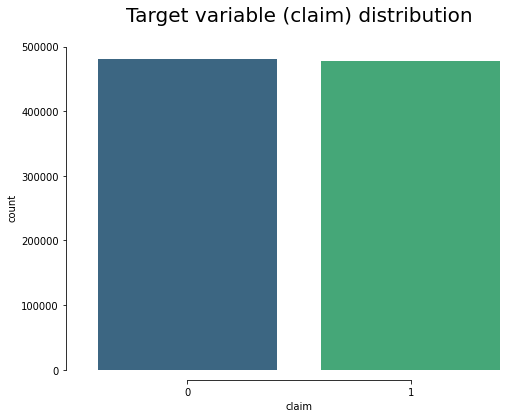

In [20]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=target, palette='viridis')
ax.set_title('Target variable (claim) distribution', fontsize=20, y=1.05)

sns.despine(right=True)
sns.despine(offset=10, trim=True)

Claim : The Target
 - Target is faily balanced

In [22]:
#let's  get a portion of the data for faster rendering
train_ = df_train[0:9579]
test_ = df_test[0:4934]

### Features f1 to f60
- Similar distribution in test and train datasets

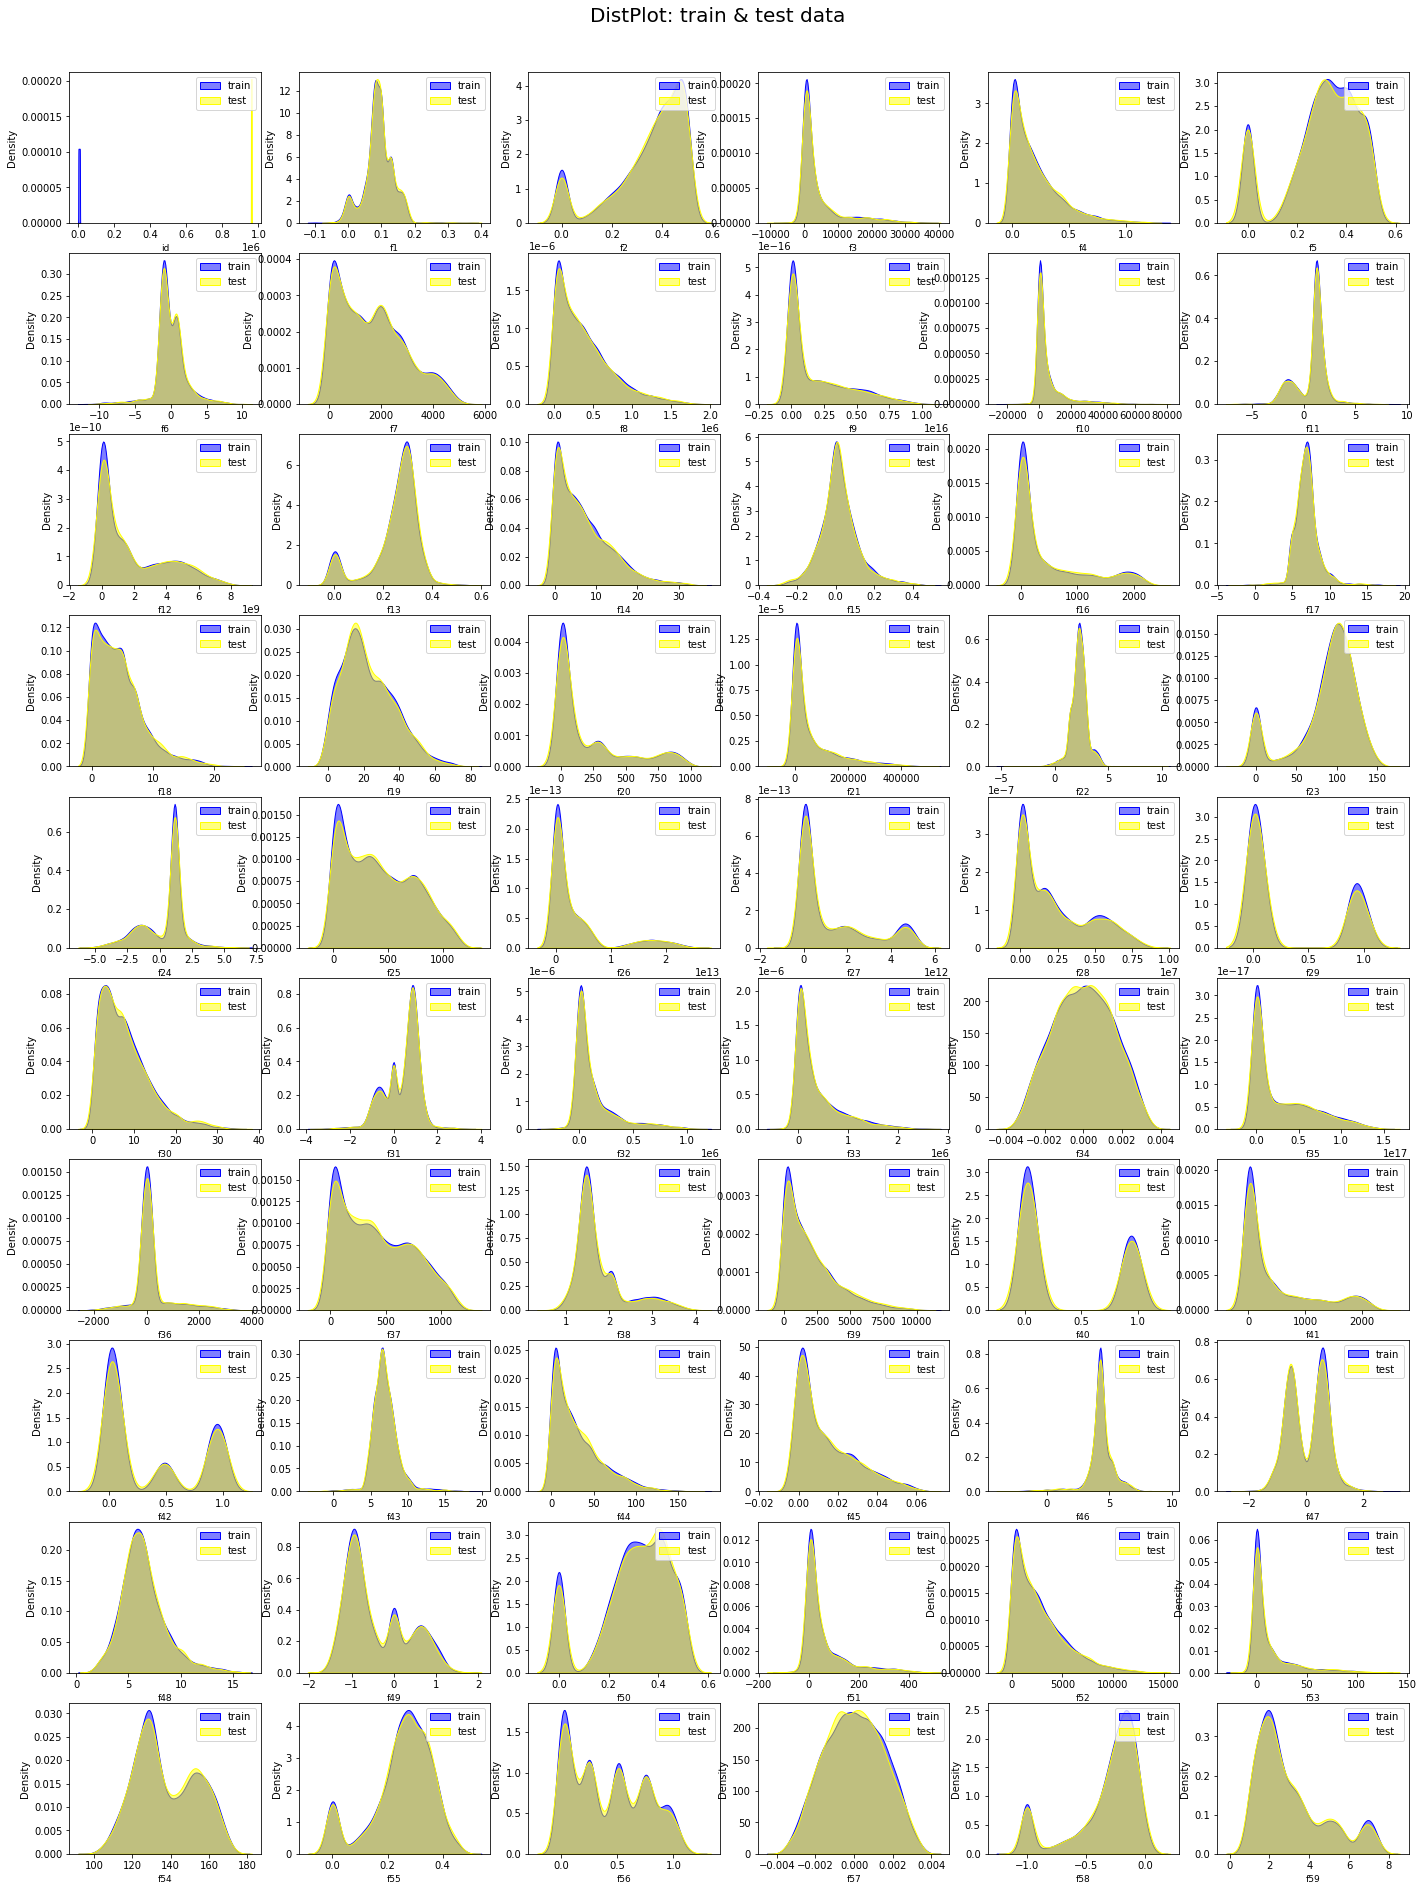

In [23]:
L = len(df_train.columns[0:60])
nrow= int(np.ceil(L/6))
ncol= 6

remove_last= (nrow * ncol) - L

fig, ax = plt.subplots(nrow, ncol,figsize=(24, 30))
#ax.flat[-remove_last].set_visible(False)
fig.subplots_adjust(top=0.95)
i = 1
for feature in df_train.columns[0:60]:
    plt.subplot(nrow, ncol, i)
    ax = sns.kdeplot(train_[feature], shade=True, color='blue',  alpha=0.5, label='train')
    ax = sns.kdeplot(test_[feature], shade=True, color='yellow',  alpha=0.5, label='test')
    plt.xlabel(feature, fontsize=9)
    plt.legend()
    i += 1
plt.suptitle('DistPlot: train & test data', fontsize=20)
plt.show()

### Features f61 to f118
- similar distribution in test and train datasets

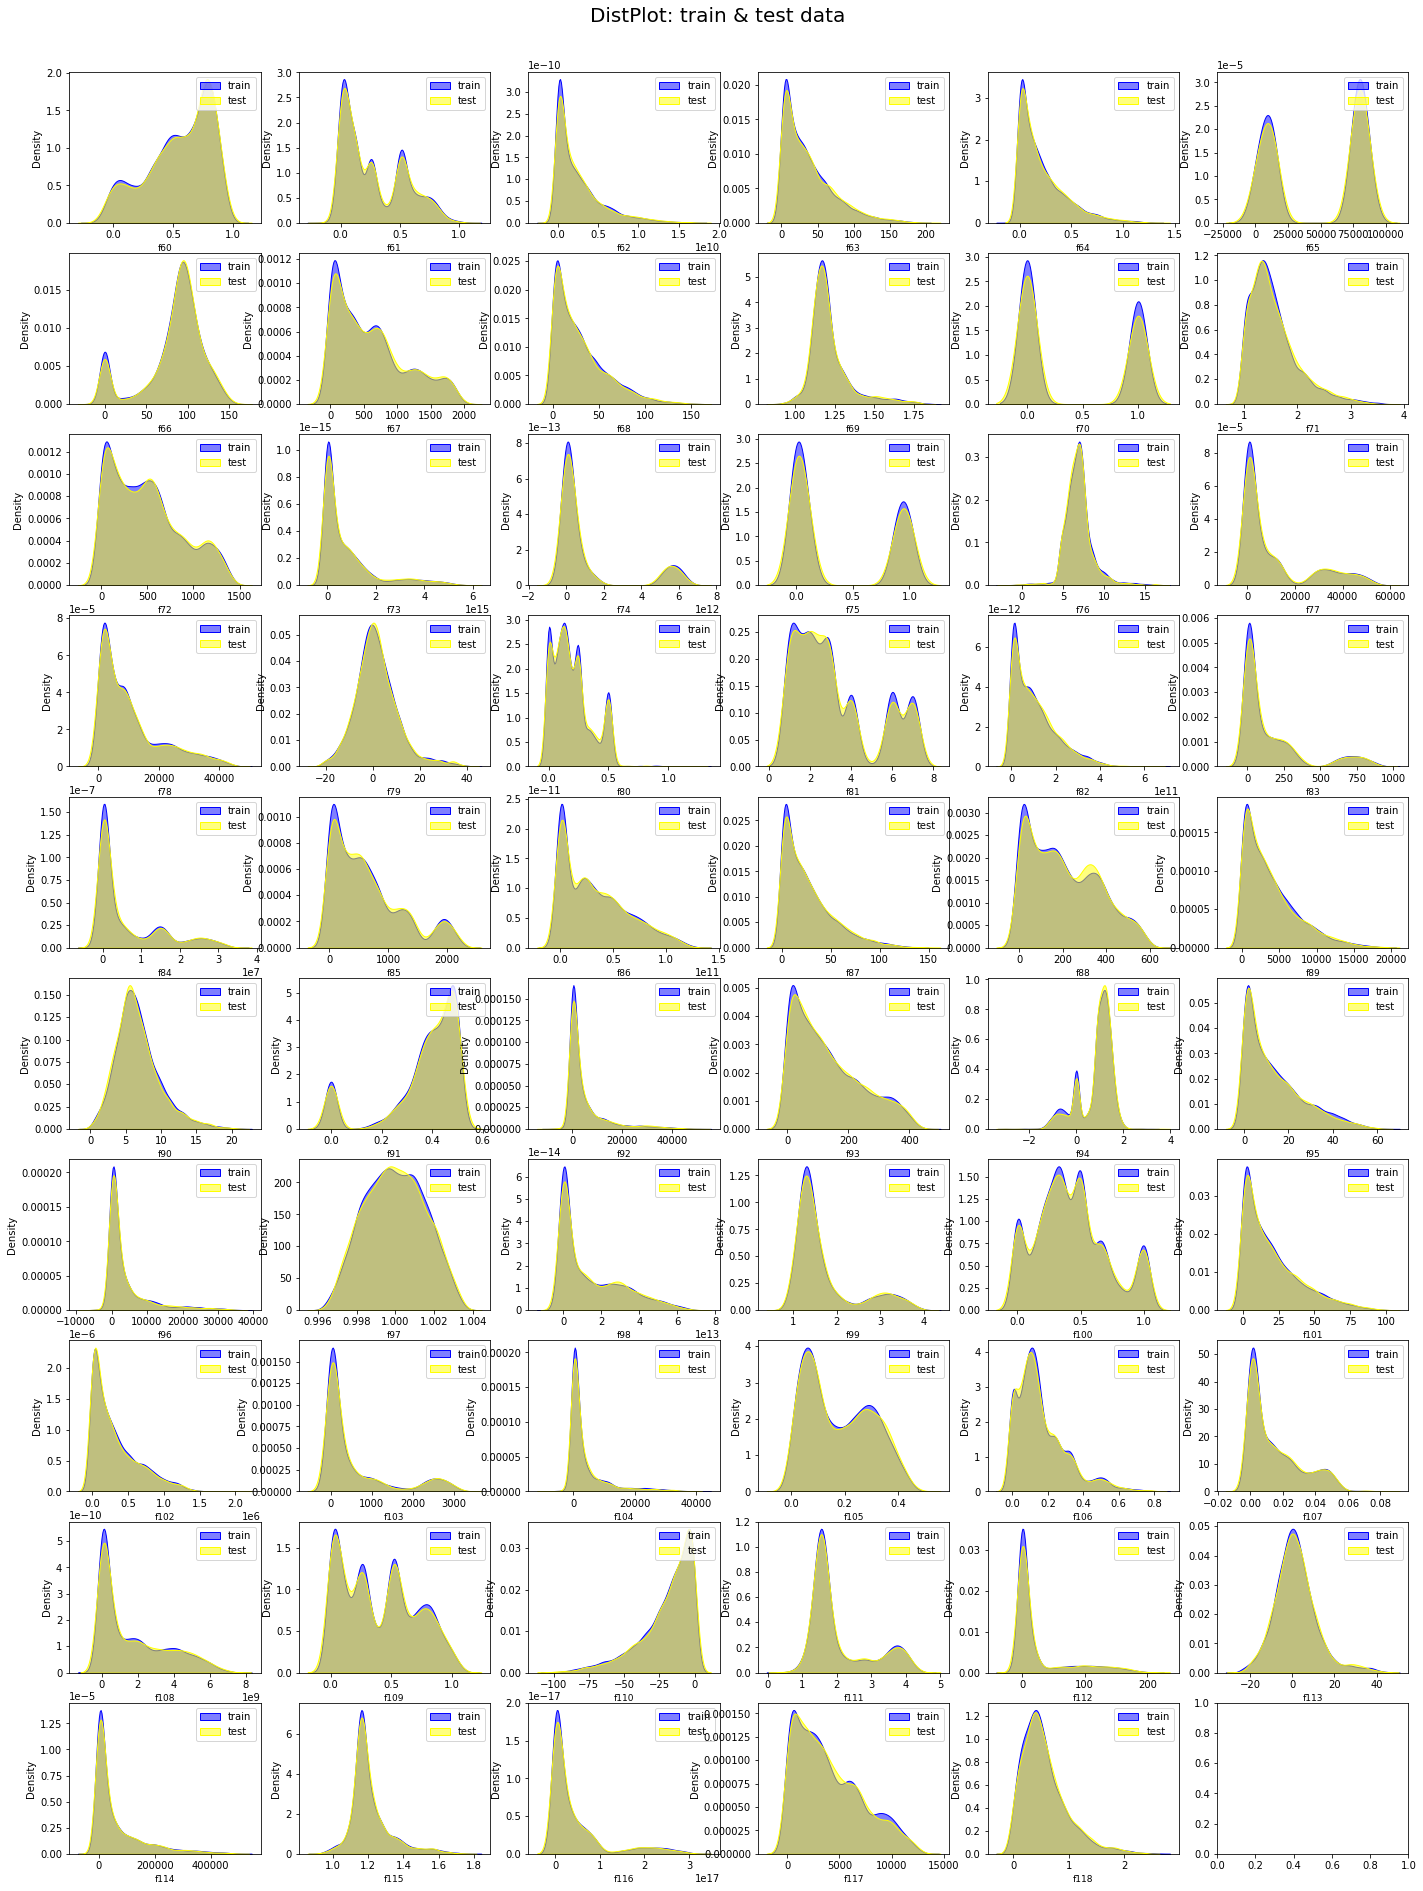

In [26]:
L = len(df_train.columns[61:])
nrow= int(np.ceil(L/6))
ncol= 6

remove_last= (nrow * ncol) - L

fig, ax = plt.subplots(nrow, ncol,figsize=(24, 30))
#ax.flat[-remove_last].set_visible(False)
fig.subplots_adjust(top=0.95)
i = 1
for feature in df_train.columns[60:]:
    plt.subplot(nrow, ncol, i)
    ax = sns.kdeplot(train_[feature], shade=True, color='blue',  alpha=0.5, label='train')
    ax = sns.kdeplot(test_[feature], shade=True, color='yellow',  alpha=0.5, label='test')
    plt.xlabel(feature, fontsize=9)
    plt.legend()
    i += 1
plt.suptitle('DistPlot: train & test data', fontsize=20)
plt.show()

### Features with respect to claim(train)

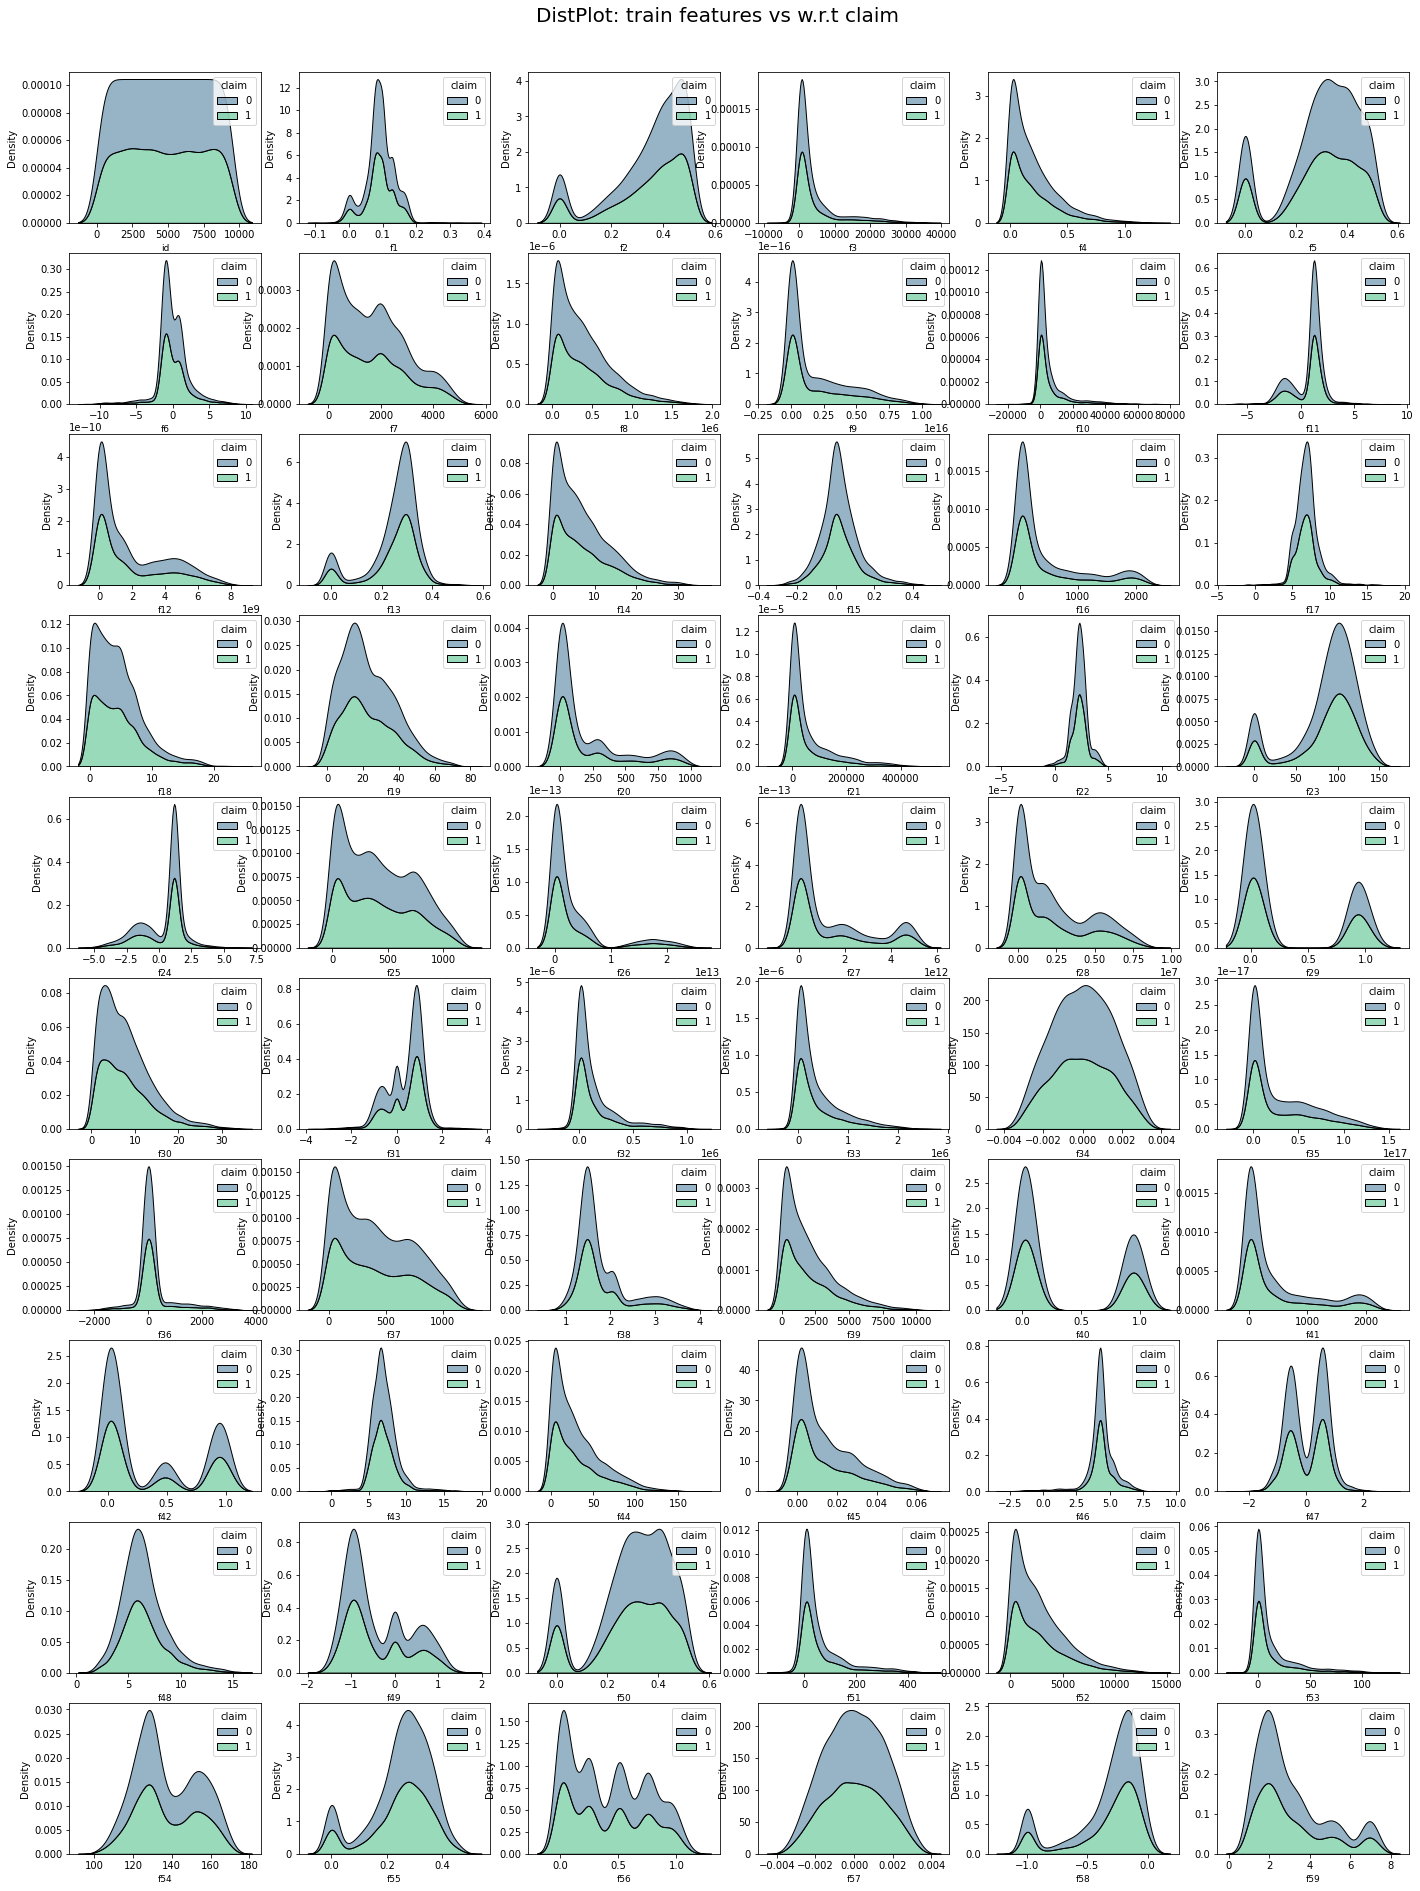

In [29]:

L = len(df_train.columns[0:60])
nrow= int(np.ceil(L/6))
ncol= 6

remove_last= (nrow * ncol) - L

fig, ax = plt.subplots(nrow, ncol,figsize=(24, 30))
#ax.flat[-remove_last].set_visible(False)
fig.subplots_adjust(top=0.95)
i = 1
for feature in df_train.columns[0:60]:
    plt.subplot(nrow, ncol, i)
    ax = sns.kdeplot(train_[feature], shade=True, palette='viridis',  alpha=0.5, hue= target, multiple="stack")
    plt.xlabel(feature, fontsize=9)
    i += 1
plt.suptitle('DistPlot: train features vs w.r.t claim', fontsize=20)
plt.show()

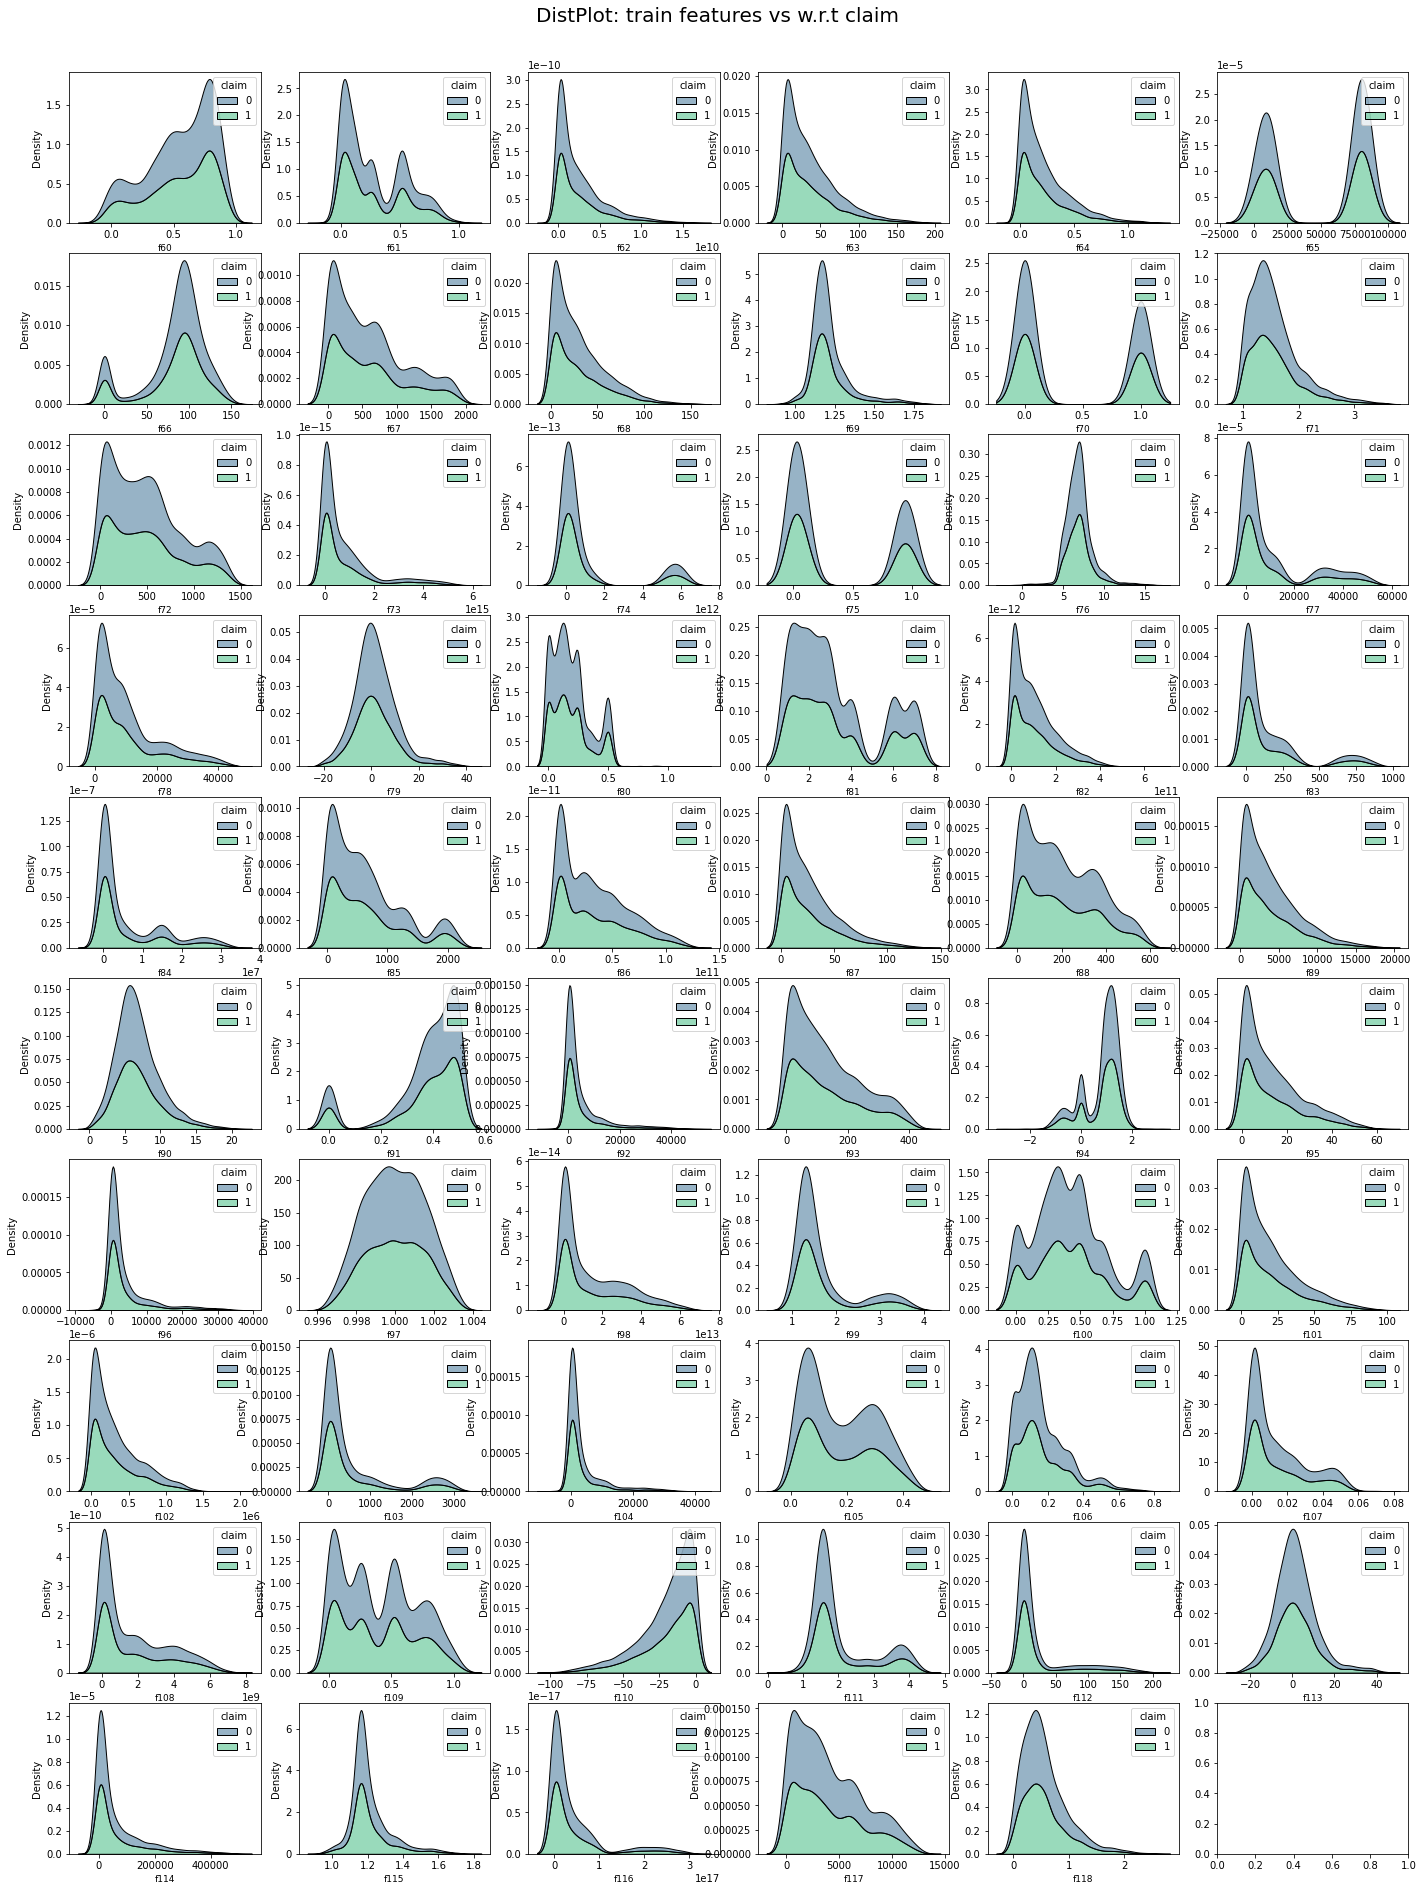

In [30]:
L = len(df_train.columns[60:])
nrow= int(np.ceil(L/6))
ncol= 6

remove_last= (nrow * ncol) - L

fig, ax = plt.subplots(nrow, ncol,figsize=(24, 30))
#ax.flat[-remove_last].set_visible(False)
fig.subplots_adjust(top=0.95)
i = 1
for feature in df_train.columns[60:]:
    plt.subplot(nrow, ncol, i)
    ax = sns.kdeplot(train_[feature], shade=True, palette='viridis',  alpha=0.5, hue= target, multiple="stack")
    plt.xlabel(feature, fontsize=9)
    i += 1
plt.suptitle('DistPlot: train features vs w.r.t claim', fontsize=20)
plt.show()

#### Correlations
- There seem to little or no correlation between features as well as feature-to-target correlation.

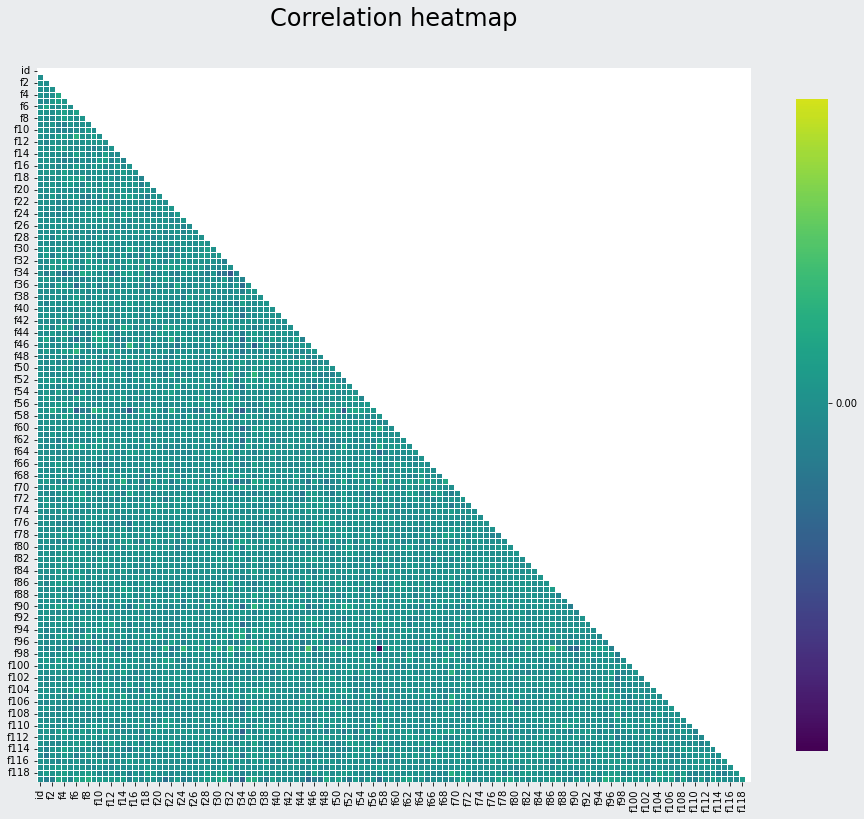

In [32]:
train = pd.read_csv(TRAIN_PATH)
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(16, 16), facecolor='#EAECEE')
cmap = sns.color_palette("viridis",
                         as_cmap=True)
sns.heatmap(corr,
            mask=mask,
            cmap=cmap,
           vmax=0.05,
           center=0,
           annot=False,
           square=True,
           linewidths=.5,
           cbar_kws={'shrink' : 0.75})

ax.set_title('Correlation heatmap', fontsize=24, y=1.05)
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([-0.75, 0, 9.75])

## EDA summary:
- There are missing values in both train and test dataset. They are within 2% of total rows.
- The distribution of target variable (claim) is balanced, almost 50%-50%.
- The distribution of features in both train and test dataset is similar.
- Correlation between features as well as correlation between features and target is weak at best.